# Crop recommendation and Prediction Using ML

#### ML is uniquely suited to help in prediction of crops to grow based on the NPK values, rainfall and othe factors. In future the code can be expanded to take input on additional factors or to converse with the user using LLM's

In [28]:
# Importing all the required libraries
import numpy as np 
import pandas as pd # data processing andI/O
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
import seaborn as sns # for plots
import matplotlib.pyplot as plt # for plots
%matplotlib inline

In [29]:
df=pd.read_csv('crop_recommendation-dataset\crop_recommendation.csv')
df.head()

<>:1: SyntaxWarning: invalid escape sequence '\c'
<>:1: SyntaxWarning: invalid escape sequence '\c'
C:\Users\Prabhat\AppData\Local\Temp\ipykernel_2820\1559100920.py:1: SyntaxWarning: invalid escape sequence '\c'
  df=pd.read_csv('crop_recommendation-dataset\crop_recommendation.csv')


,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [30]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


# Data Analysis

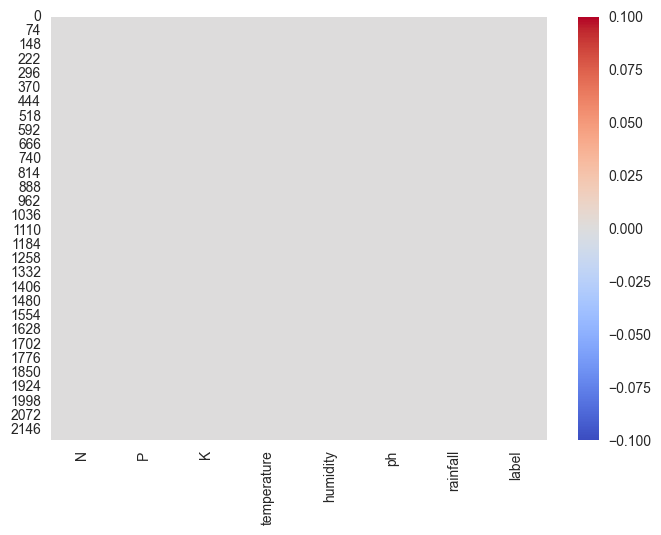

In [31]:
#Heatmap to check null values
sns.heatmap(df.isnull(),cmap="coolwarm")
plt.show()

<Axes: xlabel='ph', ylabel='Density'>

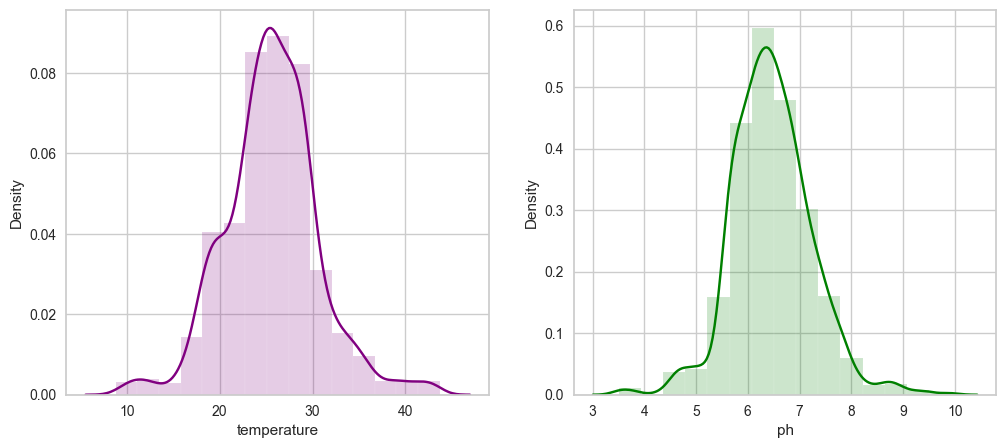

In [32]:
# Distribution of pH and temperature
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
# sns.distplot(df_setosa['sepal_length'],kde=True,color='green',bins=20,hist_kws={'alpha':0.3})
sns.distplot(df['temperature'],color="purple",bins=15,hist_kws={'alpha':0.2})
plt.subplot(1, 2, 2)
sns.distplot(df['ph'],color="green",bins=15,hist_kws={'alpha':0.2})

<Axes: xlabel='count', ylabel='label'>

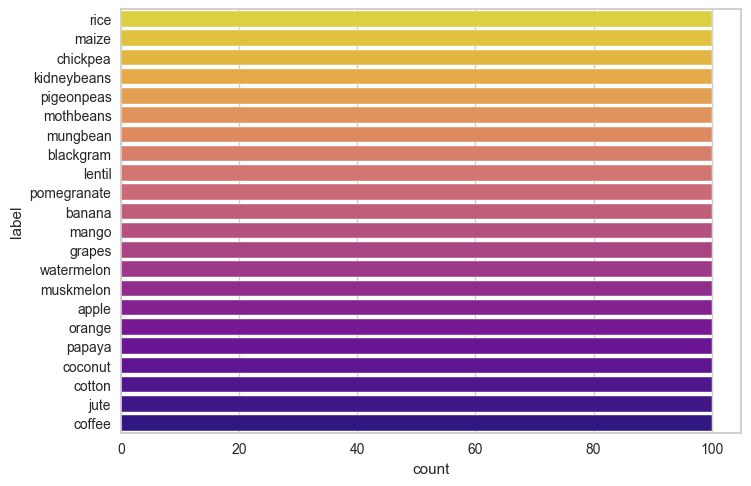

In [33]:
#Checking whether the dataset is balanced for all the crops
sns.countplot(y='label',data=df, palette="plasma_r")

In [ ]:
# Visualize the diagonal distribution between two features for all the combinations
sns.pairplot(df, hue = 'label')

#### During rainy season, average rainfall is high (average 120 mm) and temperature is mildly chill (less than 30'C).
#### Rain affects soil moisture which affects ph of the soil. Here are the crops which are likely to be planted during this season.
#### Rice needs heavy rainfall (>200 mm) and a humidity above 80%. No wonder major rice production in India comes from East Coasts which has average of 220 mm rainfall every year!
#### Coconut is a tropical crop and needs high humidity therefore explaining massive exports from coastal areas around the country

In [ ]:
sns.jointplot(x="rainfall",y="humidity",data=df[(df['temperature']<30) & (df['rainfall']>120)],hue="label")

#### This graph correlates with average potassium (K) and average nitrogen (N) value (both>50)
#### Soil ingredients direcly affect the  nutritional value of the food. Fruits which are high in nutrients also have consistent potassium values.

In [ ]:
sns.jointplot(x="K",y="N",data=df[(df['N']>40)&(df['K']>40)],hue="label")

#### Generating plot between K and humidity levels

In [ ]:
sns.jointplot(x="K",y="humidity",data=df,hue='label',size=8,s=30,alpha=0.7)

#### pH of the soil is one of the most important factors when it comes to crop growth. The soil should neither be too acidic or too alkaline. A pH value between 6 & 7 is ideal

In [ ]:
sns.boxplot(y='label',x='ph',data=df)

#### Another interesting fact is that phosphorus levels are quite differentiable when it rains heavily (>150mm)

In [ ]:
sns.boxplot(y='label',x='P',data=df[df['rainfall']>150])

#### When humidity is less than 65, almost same phosphor levels(approx 14 to 25) are required for 6 crops which could be grown just based on the amount of rain expected over the next few weeks

In [ ]:
sns.lineplot(data = df[(df['humidity']<65)], x = "K", y = "rainfall",hue="label")

# Data Pre-Processing

In [14]:
c=df.label.astype('category')
targets = dict(enumerate(c.cat.categories))
df['target']=c.cat.codes

y=df.target
X=df[['N','P','K','temperature','humidity','ph','rainfall']]

#### Correlation heatmap between features. P and K are highly correlated

In [ ]:
sns.heatmap(X.corr())

## Feature Scaling
#### As temp and are gaussian distributed, scaling them between 0 and 1 with MinMaxScaler

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=1)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)

# we must apply the scaling to the test set as well that we are computing for the training set
X_test_scaled = scaler.transform(X_test)

# Model Selection

## KNN Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)
knn.score(X_test_scaled, y_test)

In [ ]:
from sklearn.metrics import confusion_matrix
mat=confusion_matrix(y_test,knn.predict(X_test_scaled))
df_cm = pd.DataFrame(mat, list(targets.values()), list(targets.values()))
sns.set(font_scale=1.0) # for label size
plt.figure(figsize = (12,8))
sns.heatmap(df_cm, annot=True, annot_kws={"size": 12},cmap="terrain")

In [ ]:
k_range = range(1,11)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train_scaled, y_train)
    scores.append(knn.score(X_test_scaled, y_test))

plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.vlines(k_range,0, scores, linestyle="dashed")
plt.ylim(0.96,0.99)
plt.xticks([i for i in range(1,11)]);

## Classification using SVC

In [ ]:
from sklearn.svm import SVC

svc_linear = SVC(kernel = 'linear').fit(X_train_scaled, y_train)
print("Linear Kernel Accuracy: ",svc_linear.score(X_test_scaled,y_test))

svc_poly = SVC(kernel = 'rbf').fit(X_train_scaled, y_train)
print("Rbf Kernel Accuracy: ", svc_poly.score(X_test_scaled,y_test))

svc_poly = SVC(kernel = 'poly').fit(X_train_scaled, y_train)
print("Poly Kernel Accuracy: ", svc_poly.score(X_test_scaled,y_test))

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

parameters = {'C': np.logspace(-3, 2, 6).tolist(), 'gamma': np.logspace(-3, 2, 6).tolist()}
# 'degree': np.arange(0,5,1).tolist(), 'kernel':['linear','rbf','poly']

model = GridSearchCV(estimator = SVC(kernel="linear"), param_grid=parameters, n_jobs=-1, cv=4)
model.fit(X_train, y_train)

In [ ]:
print(model.best_score_ )
print(model.best_params_ )

# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=42).fit(X_train, y_train)
clf.score(X_test,y_test)

In [ ]:
plt.figure(figsize=(10,4), dpi=80)
c_features = len(X_train.columns)
plt.barh(range(c_features), clf.feature_importances_)
plt.xlabel("Feature importance")
plt.ylabel("Feature name")
plt.yticks(np.arange(c_features), X_train.columns)
plt.show()

# Random Forest

In [ ]:
# max depth and n_estimator are important to fine tune otherwise trees will be densely graphed which will be a classic case of overfitting. max_depth=4 and n_estimators=10 gives pretty much satisfying results by making sure model is able to generalize well.


from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=4,n_estimators=100,random_state=42).fit(X_train, y_train)

print('RF Accuracy on training set: {:.2f}'.format(clf.score(X_train, y_train)))
print('RF Accuracy on test set: {:.2f}'.format(clf.score(X_test, y_test)))

## Classification Report

In [ ]:
from yellowbrick.classifier import ClassificationReport
classes=list(targets.values())
visualizer = ClassificationReport(clf, classes=classes, support=True,cmap="Blues")

visualizer.fit(X_train, y_train)  # Fit the visualizer and the model
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()  

# Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
# Scale the features during training
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit and transform the training data
X_test_scaled = scaler.transform(X_test)  # Only transform the test data (do not fit again)

# Train the model on the scaled data
grad = GradientBoostingClassifier().fit(X_train_scaled, y_train)
print('Gradient Boosting accuracy : {}'.format(grad.score(X_test_scaled, y_test)))

In [ ]:
import gradio as gr
import numpy as np

# Define the prediction function
def predict_crop(N, P, K, temperature, humidity, pH, rainfall):
    # Scale the input data using the same MinMaxScaler
    input_data = np.array([N, P, K, temperature, humidity, pH, rainfall]).reshape(1, -1)
    
    # Ensure the input is scaled using the same scaler as during training
    scaled_input = scaler.transform(input_data)  # Apply the scaler to input features
    
    # Predict using the trained model
    prediction_index = grad.predict(scaled_input)[0]  # Get the predicted index
    
    # Map the index to the corresponding crop name using the 'targets' dictionary
    predicted_crop = targets[prediction_index]
    return predicted_crop  # Return the predicted crop name

# Create the Gradio interface
inputs = [
    gr.Number(label="Nitrogen (N)"),
    gr.Number(label="Phosphorus (P)"),
    gr.Number(label="Potassium (K)"),
    gr.Number(label="Temperature (°C)"),
    gr.Number(label="Humidity (%)"),
    gr.Number(label="pH"),
    gr.Number(label="Rainfall (mm)")
]
outputs = gr.Text(label="Predicted Crop Type")

interface = gr.Interface(
    fn=predict_crop,
    inputs=inputs,
    outputs=outputs,
    title="Crop Recommendation System",
    description="Enter values for N, P, K, temperature, humidity, pH, and rainfall to predict the recommended crop."
)

interface.launch()